### Importing Libraries and Data

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
import nltk
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [62]:
data = pd.read_csv(r"C:\Users\sanjay\Desktop\Analytics Vidya\Python\MACHINE LEARNING\ML Assignments\NLP\SMSSpamCollection_NLP.tsv",
                 delimiter="\t",encoding = 'utf-8',header = None)

In [63]:
data.rename(columns ={0:'label',1:'Message'},inplace = True)
data.head()

,label,Message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [64]:
data['label'].value_counts()

ham     4822
spam     746
Name: label, dtype: int64

### Preprocessing Data

In [65]:
stop_words = set(stopwords.words('english'))

In [66]:
#Count the number of punctuation
spam_df = data[data['label'] == 'spam'] #create sub-dataframe of spam text
ham_df = data[data['label'] == 'ham'] #sub-dataframe of ham text
spam_df['punct']=spam_df['Message'].apply(lambda l1: sum([1 for x in l1 if x in set(string.punctuation)]))
ham_df['punct']= ham_df['Message'].apply(lambda l1: sum([1 for x in l1 if x in set(string.punctuation)]))

C:\Users\sanjay\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\sanjay\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [67]:
spam_df

,label,Message,punct
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,6
6,spam,WINNER!! As a valued network customer you have...,6
7,spam,Had your mobile 11 months or more? U R entitle...,2
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",8
10,spam,URGENT! You have won a 1 week FREE membership ...,8
...,...,...,...
5533,spam,Want explicit SEX in 30 secs? Ring 02073162414...,3
5536,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,5
5543,spam,Had your contract mobile 11 Mnths? Latest Moto...,8
5562,spam,REMINDER FROM O2: To get 2.50 pounds free call...,3


In [68]:
### Q1. Preprocess the data so that stopwords are removed
### Q2. Write down a function that can count percentage of punctuation marks in the text
def tokenize(text):
   ## exclude = set(string.punctuation)
    regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]') #remove punctuation
    text = regex.sub(' ', text)
    tokens = nltk.word_tokenize(text) # tokenize the text
    tokens = list(filter(lambda x: x.lower() not in stop_words, tokens)) # remove stop words
    tokens = [w.lower() for w in tokens if len(w) >=3] 
    tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
    return tokens

In [69]:
spam_df['tokens'] = spam_df['Message'].map(tokenize)
ham_df['tokens'] = ham_df['Message'].map(tokenize)

C:\Users\sanjay\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sanjay\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
spam_df

,label,Message,punct,tokens
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,6,"[free, entry, wkly, comp, win, cup, final, tkt..."
6,spam,WINNER!! As a valued network customer you have...,6,"[winner, valued, network, customer, selected, ..."
7,spam,Had your mobile 11 months or more? U R entitle...,2,"[mobile, months, entitled, update, latest, col..."
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",8,"[six, chances, win, cash, pounds, txt, csh, se..."
10,spam,URGENT! You have won a 1 week FREE membership ...,8,"[urgent, week, free, membership, prize, jackpo..."
...,...,...,...,...
5533,spam,Want explicit SEX in 30 secs? Ring 02073162414...,3,"[want, explicit, sex, secs, ring, costs, min, ..."
5536,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,5,"[asked, mobile, chatlines, inclu, free, mins, ..."
5543,spam,Had your contract mobile 11 Mnths? Latest Moto...,8,"[contract, mobile, mnths, latest, motorola, no..."
5562,spam,REMINDER FROM O2: To get 2.50 pounds free call...,3,"[reminder, get, pounds, free, call, credit, de..."


In [71]:
spam_words = []
for token in spam_df['tokens']:
    spam_words = spam_words + token #combine text in different columns in one list
ham_words = []
for token in ham_df['tokens']:
    ham_words += token

In [72]:
spam_count = Counter(spam_words).most_common(10)
ham_count = Counter(ham_words).most_common(10)

In [73]:
spam_count_df = pd.DataFrame(spam_count, columns = ['word', 'count'])
ham_count_df = pd.DataFrame(ham_count, columns = ['word', 'count'])

In [74]:
spam_count_df.head(3)

,word,count
0,call,370
1,free,228
2,txt,170


Text(0.5, 1.0, 'ham top 10 words')

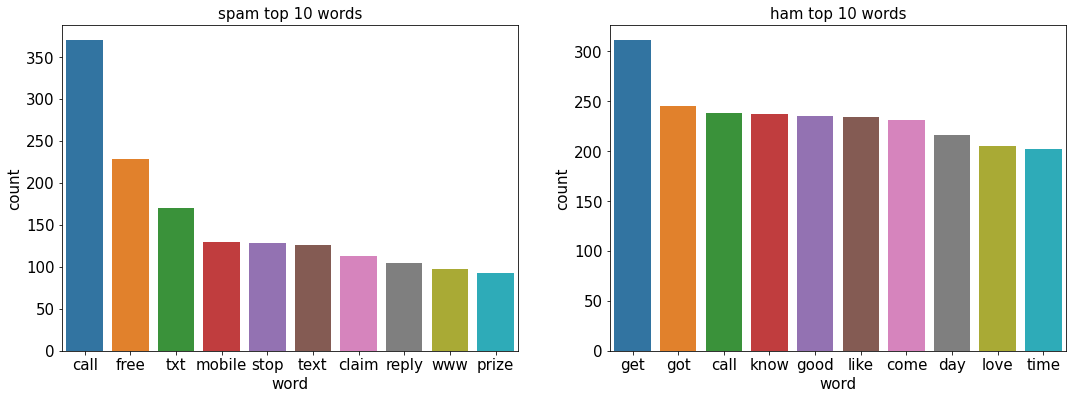

In [75]:
fig, (ax,ax1) = plt.subplots(1,2,figsize = (18, 6))
# for spam_count_df (spam words and there count)
sns.barplot(x = spam_count_df['word'], y = spam_count_df['count'], ax = ax)
ax.set_ylabel('count', fontsize = 15)
ax.set_xlabel('word',fontsize = 15)
ax.tick_params(labelsize=15)
ax.set_title('spam top 10 words', fontsize = 15)
# for ham_count_df (ham words and there count)
sns.barplot(x = ham_count_df['word'], y = ham_count_df['count'], ax = ax1)
ax1.set_ylabel('count', fontsize = 15)
ax1.set_xlabel('word',fontsize = 15)
ax1.tick_params(labelsize=15)
ax1.set_title('ham top 10 words', fontsize = 15)

In [76]:
spam_words_str = ' '.join(spam_words) #joined all the spam words into a paragraph
ham_words_str = ' '.join(ham_words)

In [77]:
spam_word_cloud = WordCloud(width = 600, height = 400, background_color = 'white').generate(spam_words_str)
ham_word_cloud = WordCloud(width = 600, height = 400,background_color = 'white').generate(ham_words_str)

In [78]:
spam_word_cloud = WordCloud(width = 600, height = 400, background_color = 'white').generate(spam_words_str)
ham_word_cloud = WordCloud(width = 600, height = 400,background_color = 'white').generate(ham_words_str)

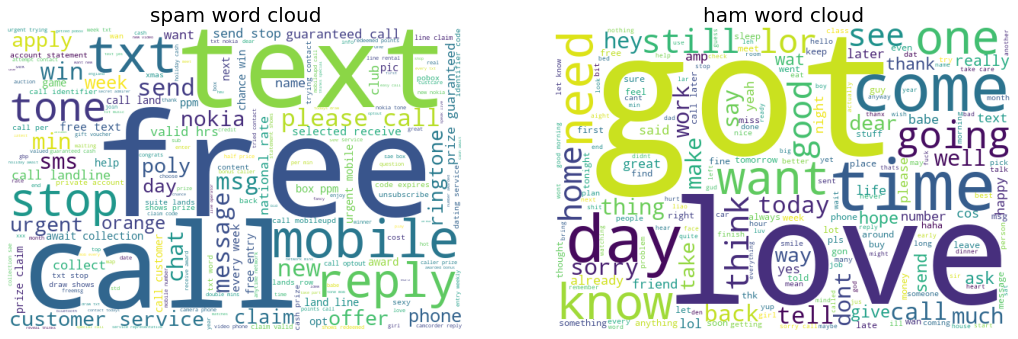

In [79]:
fig, (ax, ax2) = plt.subplots(1,2, figsize = (18,8))
ax.imshow(spam_word_cloud)
ax.axis('off')
ax.set_title('spam word cloud', fontsize = 20)
ax2.imshow(ham_word_cloud)
ax2.axis('off')
ax2.set_title('ham word cloud', fontsize = 20)
plt.show()

In [80]:
data.head()

,label,Message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [81]:
data['tokens'] = data['Message'].map(tokenize)

In [82]:
data.head()

,label,Message,tokens
0,ham,I've been searching for the right words to tha...,"[searching, right, words, thank, breather, pro..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, cup, final, tkt..."
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"


In [83]:
def text_join(text):
    return " ".join(text)
data['text'] = data['tokens'].apply(text_join)
data.head()

,label,Message,tokens,text
0,ham,I've been searching for the right words to tha...,"[searching, right, words, thank, breather, pro...",searching right words thank breather promise w...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, cup, final, tkt...",free entry wkly comp win cup final tkts may te...
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]",nah think goes usf lives around though
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aids...",even brother like speak treat like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",date sunday


In [84]:
#Tfidf - Term frequency * inverse document frequency - it return result in form of vector matrix
tv = TfidfVectorizer('english')
features = tv.fit_transform(data['text'])
target = data.label.map({'ham':0, 'spam':1})
data.head()

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


,label,Message,tokens,text
0,ham,I've been searching for the right words to tha...,"[searching, right, words, thank, breather, pro...",searching right words thank breather promise w...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, cup, final, tkt...",free entry wkly comp win cup final tkts may te...
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]",nah think goes usf lives around though
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aids...",even brother like speak treat like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",date sunday


In [85]:
print(tv.get_feature_names())

['aah', 'aaniye', 'aaooooright', 'aathi', 'abbey', 'abdomen', 'abeg', 'abel', 'aberdeen', 'abi', 'ability', 'abiola', 'abj', 'able', 'abnormally', 'aboutas', 'abroad', 'absence', 'absolutely', 'absolutly', 'abstract', 'abt', 'abta', 'aburo', 'abuse', 'abusers', 'academic', 'acc', 'accent', 'accenture', 'accept', 'access', 'accessible', 'accidant', 'accident', 'accidentally', 'accommodation', 'accommodationvouchers', 'accomodate', 'accomodations', 'accordin', 'accordingly', 'account', 'accounting', 'accounts', 'accumulation', 'achan', 'ache', 'achieve', 'acid', 'acknowledgement', 'acl', 'acnt', 'aco', 'across', 'act', 'acted', 'actin', 'acting', 'action', 'activ', 'activate', 'active', 'activities', 'actor', 'actual', 'actually', 'adam', 'add', 'addamsfa', 'added', 'addicted', 'addie', 'adding', 'address', 'adds', 'adewale', 'adi', 'adjustable', 'admin', 'administrator', 'admirer', 'admission', 'admit', 'adore', 'adoring', 'adp', 'adress', 'adrian', 'adrink', 'ads', 'adsense', 'adult', 

In [86]:
print(features)

  (0, 6522)	0.21240172171538857
  (0, 681)	0.28779286336044224
  (0, 7211)	0.23129060963718676
  (0, 2447)	0.30147865484161235
  (0, 2639)	0.30147865484161235
  (0, 2827)	0.18667696852903184
  (0, 6304)	0.15783761888925946
  (0, 7214)	0.20584831261724948
  (0, 4960)	0.5014221136222605
  (0, 786)	0.30147865484161235
  (0, 6423)	0.21007298359717372
  (0, 7224)	0.21904134622417107
  (0, 5322)	0.1741354667976908
  (0, 5520)	0.26439684829230037
  (1, 294)	0.223924063717292
  (1, 5093)	0.223924063717292
  (1, 6725)	0.1642426115382969
  (1, 6059)	0.26406556725773256
  (1, 5041)	0.2371149033224104
  (1, 5147)	0.22177412768949156
  (1, 6409)	0.16255267468985002
  (1, 3847)	0.20801825046646866
  (1, 6544)	0.292874514917438
  (1, 2240)	0.24409575047115994
  (1, 1451)	0.26406556725773256
  :	:
  (5563, 1132)	0.24744987878561345
  (5563, 4927)	0.25992346080107176
  (5563, 4626)	0.2782360417326417
  (5563, 5093)	0.3073780691747392
  (5564, 2020)	0.7827025226145358
  (5564, 2583)	0.4395153056660104
 

In [87]:
print(target)

0       0
1       1
2       0
3       0
4       0
       ..
5563    1
5564    0
5565    0
5566    0
5567    0
Name: label, Length: 5568, dtype: int64


In [88]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score,classification_report
# from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

### Split into train/test

In [89]:
### Q3. Split the whole data set into training and test datasets
X = features
y = target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(4454, 7380)
(1114, 7380)
(4454,)
(1114,)


In [31]:
from collections import Counter #smote used because the dataset was imbalanced(counter helps in counting just)
from imblearn.combine import SMOTETomek
smt=SMOTETomek(0.80) #80% of the data 
X_train_smt,y_train_smt=smt.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smt)))

C:\Users\sanjay\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 3867, 1: 587})
The number of classes after fit Counter({0: 3867, 1: 3093})


## Decision tree classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_smt, y_train_smt)
y_pred = dtc.predict(X_val)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dtc.score(X_val, y_val)))

Accuracy of Decision Tree Classifier on test set: 0.96


In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
# print(sns.heatmap(cm, annot=True))
print(cm)

[[932  23]
 [ 20 139]]


In [34]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       955
           1       0.86      0.87      0.87       159

    accuracy                           0.96      1114
   macro avg       0.92      0.93      0.92      1114
weighted avg       0.96      0.96      0.96      1114



## XGBOOST

In [35]:
from xgboost import XGBClassifier

In [36]:
xgb = XGBClassifier()
xgb.fit(X_train_smt, y_train_smt)
y_pred = xgb.predict(X_val)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(xgb.score(X_val, y_val)))

Accuracy of Decision Tree Classifier on test set: 0.98


## Random Forest

In [37]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [38]:
#creating a random forest instance   #while initializing no parameter
rfr =RandomForestClassifier(random_state=56)

In [39]:
#train the model
rfr.fit(X_train_smt, y_train_smt)

RandomForestClassifier(random_state=56)

In [40]:
#score on training data
rfr.score(X_train_smt, y_train_smt)

0.9998563218390805

In [41]:
#score on validation data
rfr.score(X_val,y_val)

0.9838420107719928

In [42]:
y_predict = rfr.predict(X_val)
RF=pd.DataFrame({'Actual':y_val, 'Predicted':y_predict})  
RF.head(5)

,Actual,Predicted
3987,1,0
690,0,0
944,0,0
2565,0,0
4029,0,0


## Ensemble classifiers

### I. Boosting Algorithms

#### 1. AdaBoost

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9636282561596211
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       981
           1       0.79      0.95      0.86       133

    accuracy                           0.96      1114
   macro avg       0.89      0.96      0.92      1114
weighted avg       0.97      0.96      0.97      1114



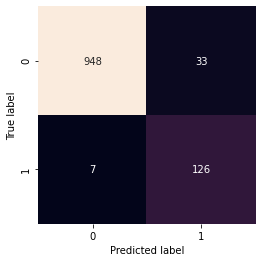

In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=45)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=45)
model.fit(X_train, y_train)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

y_pred = model.predict(X_val)

from sklearn import metrics
print(metrics.classification_report(y_pred, y_val))


mat = confusion_matrix(y_val, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label');

#### 2. Stochastic Gradient Boosting

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9678928805361012
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       987
           1       0.77      0.97      0.86       127

    accuracy                           0.96      1114
   macro avg       0.88      0.97      0.92      1114
weighted avg       0.97      0.96      0.97      1114



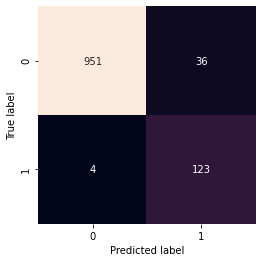

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=45)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state = 45)
model.fit(X_train, y_train)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

y_pred = model.predict(X_val)

from sklearn import metrics
print(metrics.classification_report(y_pred, y_val))


mat = confusion_matrix(y_val, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label');

### II. Bagging Algorithms

#### 1. Bagged Decision Trees

In [114]:
from sklearn.ensemble import BaggingClassifier
kfold = model_selection.KFold(n_splits=10, random_state=45)
num_trees = 100
model = BaggingClassifier(base_estimator=dtc, n_estimators=num_trees, random_state=45)
model.fit(X_train, y_train)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold,scoring = 'accuracy')
print(results.mean())

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9678969113719958


In [118]:
y_pred = model.predict(X_val)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       967
           1       0.86      0.93      0.89       147

    accuracy                           0.97      1114
   macro avg       0.92      0.95      0.94      1114
weighted avg       0.97      0.97      0.97      1114



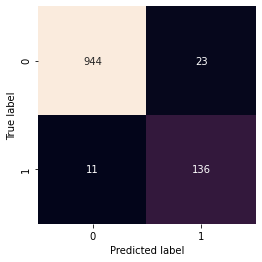

In [120]:
mat = confusion_matrix(y_val, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label');